# Project 1 Report

## Team members: Jefferson Roylance, Supratik Chanda

# Introduction
This reports analyzes various aspects of crime statistics in Austin, Texas from 2015. The primary purpose of the document is to educate the authors in techniques involving the python pandas library, as well as data analysis and visualization. Secondary purposes include useful statistics that would help with city planning (and be useful if one was walking the streets of Austin in the dark). Our analysis centered around a few important questions: 

* What are the most frequent crimes committed in 10 locations?
* How does the amount of crimes vary with unemployment rates?
* Which types of crimes get cleared the most?
* How does median income affect clearance rate of crimes?
* How does the amount of crimes committed per person vary with median income?

## Dataset

Our dataset used crime statistics gathered from Austin, Texas in 2015. It included various statistics for the surrounding area as well. The columns of this dataset were as follows: 

*  Key
*  Council District
*  Highest Offense Desc
*  Highest NIBRS UCR Offense Description
*  Report Date
*  Location
*  Clearance Status
*  Clearance Date
*  District
*  Zip Code of Crime
*  Census Tract
*  X Coordinate
*  Y Coordinate
*  Housing Zip Code
*  Population below poverty level
*  Median household income
*  Percentage of Non-White, Non-Hispanic, or Latino population
*  Percentage of Hispanic or Latino of any race
*  Percentage of Population with disability
*  Unemployment
*  Percentage of Large households(5+members)
*  Homes affordable to people earning less than \$50000
*  Rentals affordable to people earning less than \$25000
*  Rent-restricted units
*  Housing Choice Voucher holders
*  Median rent
*  Median home value
*  Percentage of rental units in poor condition
*  Percent change in number of housing units 2000-2012
*  Owner units affordable to average retail/service worker
*  Rental units affordable to average retail/service worker
*  Rental units affordable to average artist
*  Owner units affordable to average artist
*  Rental units affordable to average teacher
*  Owner units affordable to average teacher
*  Rental units affordable to average tech worker
*  Owner units affordable to average tech worker
*  Change in percentage of population below poverty 2000-2012
*  Change in median rent 2000-2012
*  Change in median home value 2000-2012
*  Percentage of homes within 1/4-mi of transit stop
*  Average monthly transportation cost
*  Percentage of housing and transportation costs that is transportation-related

This dataset was quite clean, but we had to remove some null values from the table. Furthermore, one primary weakness was the lack of population records. Since this only contained crime statistics, we were unable to utilize quite a few statistics. For example, we couldn't analyze how many crimes were committed per person (outside of the dataset mentioned next), limiting our capabilities. 

In addition to the crime dataset, we used another set of statistics downloaded from https://datausa.io/profile/geo/austin-tx/. It included population counts for various levels of median incomes, and we were able to use this data to analyze how crimes committed per capita varied with median income. 

## Analysis technique

We performed five analyses, each to answer one of the questions we posed in the introduction. 

#### Which are the most frequent crimes happened in randomly selected 10 cities?
_Analysis by Supratik Chanda_  

This analysis is just to figure which crimes are the most frequent and which crimes should be stoppped in the respective cities to reduce the crime rate .


#### How does Crime_Count varies with the unemployment rate in Austin?
#### Used correlation technique to find out whether crime_frequency is directly proportional to the unemloyment rate or not
_Analysis by Supratik Chanda_ 

A strong sense by my laureates explicitly implies that unemployment is the root cause of illegal jobs. Crime is the most obvious among them. So,this analysis is done to strenghten that inference that whether or not unemployment rate is surely the reason for rapid burst of crimes


#### Which types of crimes get cleared most?
_Analysis by Jefferson Roylance_

For this analysis, we grouped crimes by type and took the count of both total crimes and crimes that were cleared. We then plotted the results on a graph, showing what proportion of crimes of each type were cleared. 

#### How does median income affect crime clearance rate?
_Analysis by Jefferson Roylance_

We then decided to take a look at how median income affects crime clearance rate. In this case, we grouped crimes by the median income and then plotted that against clearance rate. 

#### How does the average crime rate vary by median income?
_Analysis by Jefferson Roylance_

Finally, we examined how the average amount of crime records per person varied with median income. We first downloaded a dataset that showed the population of Austin, Texas for various levels of median income. Then, we cross referenced this with crimes, grouped by levels of median income. Finally, we divided the amount of crimes by the population with a specific median income, resulting in average number of crime records per person. 


    
## Results

#### Which are the most frequent crimes happened in randomly selected 10 cities?
Figure 1 describes  which players are the best among all .
<img src='Chart_1.png' style='height:800px'>

#### How does Crime_Count varies with the unemployment rate in Austin?
Figure 2 shows whether Crime_count is directly or inversely connected with unemployment rate
<img src='Chart_2.png' style='height:800px'>

#### Analysis 3
<img src='clearanceRateByCrimeType.png'>

This chart has some interesting data. First off, we can see that theft is far and away the most popular crime. Interestingly enough, theft, along with burglary, are the least cleared crimes. Unfortunately, my knowledge of the U.S. legal system is very limited but this seems counterintuitive. Most people would think that being among the least harmful crimes, they would have the least effort put toward punishment. One hypothesis could be that it's less likely that they have a good defense lawyer, or perhaps they're offered plea deals more often?

This comes in sharp contrast to murders and aggrivated assaults, which get cleared significantly more. With murders, this could make sense because they'd be more high-profile (and therefore more likely to get a good lawyer?). With assaults, however, this is quite confusing because they'd have more witnesses, as well as plenty of evidence against them. 

#### Analysis 4
<img src='medianIncomeOnClearedCrime.png'>

This data is intriguing, but difficult to interpret. It would seem that cleared crime is largely not correlated with median income except in the low-income case and the 100,000-120,000 median income range, where crimes are cleared less? However, this called for further examination of overall crime vs median income.

<img src='medianIncomeOnCrime.png'>

Looking at this data, it becomes clear that the abberation seen in the earlier data was most probably caused by a small sample size. One interesting thing was the slight spike in the amount of crime towards the higher ranges of income - with more time, it would be fascinating to examine what sorts of crimes are committed in very high-income neighborhoods. Upon more reading on the subject, one hypothesis about why we see more crime for 120,000-140,000 income ranges is income inequality - Some sources mention that high crime is correlated with income inequality, and it would be easy to imagine that a high *median* income could still contain large amounts of low-income people. 

#### Analysis 5

<img src='medianIncomeCrimeRate.png'>



## Here we unpack the data from files

We also clean it up by removing some null values, and include various python packages

Finally, we changed some percentage and dollar values to floats to make data analysis easier.

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
import math
from scipy import stats

df=pd.read_csv('crime-housing-austin-2015.csv')

#Copy reports for this use
reports1 = df[:]

# Drop blank rows from reports1
reports1 = reports1.dropna()

reports1['HispanicorLatinoofanyrace'] = reports1['HispanicorLatinoofanyrace'].str.replace('%','').astype('float')
reports1['Medianhomevalue'] = reports1['Medianhomevalue'].str.replace('$','').astype('float')
reports1['Largehouseholds(5+members)'] = reports1['Largehouseholds(5+members)'].str.replace('%','').astype('float')
reports1['Changeinpercentageofpopulationbelowpoverty2000-2012'] = reports1['Changeinpercentageofpopulationbelowpoverty2000-2012'].str.replace('%','').astype('float')
reports1['Medianhouseholdincome'] = reports1['Medianhouseholdincome'].str.replace('$','').astype('float')
reports1['Populationbelowpovertylevel'] = reports1['Populationbelowpovertylevel'].str.replace('%','').astype('float')


# ANALYSIS 1: To find the most frequent  crime happening in randomly selected 10 cities in Austin . Why Random? Because the total cities covered in the dataset is 16764

In [20]:
k=pd.DataFrame(df.groupby(['location','Highest_NIBRS_UCR_Offense_Description']).size())
#display(k)
k.columns=['Offense Count']
k.sort_values(by='Offense Count',ascending=False,inplace=True)
k.reset_index(drop=False,inplace=True)
#display(k[k.Location == '1030 NORWOOD PARK BLVD'])
i=0
overallDTFrame= pd.DataFrame()
for each in k.location.unique():
    overallDTFrame = pd.concat([overallDTFrame,k[k.location == each][0:2]],axis=0)
    i+=1
    if i ==10:
        break
overallDTFrame.reset_index(drop=True,inplace=True)
#display(overallDTFrame)
plt.figure(figsize=(16,8))
sns.barplot(y=overallDTFrame['Offense Count'],x=overallDTFrame['location'],hue=overallDTFrame['Highest_NIBRS_UCR_Offense_Description'])    
plt.legend(loc='upper right',fontsize=20)
j=overallDTFrame['Offense Count'].values
k=0
s=0
elem=0
while k <len(j):
    ind=0
    each=0
    while ind < 2:
        plt.annotate(str(j[k]),xy=(elem,j[k]+0.5),fontsize=15)
        ind+=1
        k+=1
        each-=1.0
    elem+=1
plt.xticks(rotation=90,fontsize=10)
plt.savefig('Chart_1.png')
plt.show()
#overallDTFrame.plot(x='Location',y='Offense Count',kind='bar')
    






#j= df.groupby(['Location','Highest_NIBRS_UCR_Offense_Description']).agg({'Location':'count'})
#j.columns=['Offense Count']
#j.reset_index(drop=False,inplace=True)
#j[j.Location == '1030 NORWOOD PARK BLVD']'''
#Which location has the most crime:Highest_NIBRS_UCR_Offense_Description
#t =measure of the difference of the means relative to the spread

KeyError: 'location'

# C=Cleared by Arrest O=Cleared by Exception N=Not cleared

# Investigate how no of crimes in  particular zip-codes is proportional to the unemployment rates

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
from scipy.stats import pearsonr as pr
dtSet = pd.read_csv('crime-housing-austin-2015.csv',usecols=['Zip_Code_Crime','Highest_Offense_Desc','Unemployment'])
dtSet.dropna(axis=0,inplace=True)
k=0
dtSet.Unemployment = dtSet.Unemployment.str.replace('%','')
dtSet.Unemployment = dtSet.Unemployment.astype(int)
#print(dtSet.dtypes)
df= dtSet.groupby('Zip_Code_Crime')
finalDT = pd.DataFrame()
for k,i in df:
    initDT = pd.concat([pd.DataFrame([k]),pd.DataFrame([i.size]),pd.DataFrame([i.Unemployment.mean()])],axis=1)
    finalDT = pd.concat([finalDT,initDT],axis=0)
finalDT.columns=['Zip_Code','No_Of_Crimes','Mean_Unemployment']
finalDT.reset_index(drop=True,inplace=True)
finalDT.sort_values(by=['No_Of_Crimes'],ascending=True,axis=0,inplace=True)
#display(finalDT)
plt.figure(figsize=(16,10))
sns.lineplot(x=finalDT['Mean_Unemployment'],y=finalDT['No_Of_Crimes'],linewidth=6,color='red')
plt.xticks(rotation=45,fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Mean_Unemployment',fontsize=25)
plt.ylabel('No_Of_Crimes',fontsize=25)
plt.savefig('Chart_2.png')
plt.show()


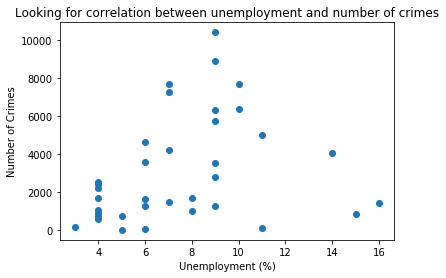

Averages
x:  7.472222222222222  y:  3107.0833333333335
Standard deviation
x:  3.2380427166608894  y:  2811.965224078806
pearson_coef:  0.27917473449148866 p_value:  0.09916755408711679


,Zip_Code,No_Of_Crimes,Mean_Unemployment
Zip_Code,1.000000,0.140904,-0.402752
No_Of_Crimes,0.140904,1.000000,0.279175
Mean_Unemployment,-0.402752,0.279175,1.000000


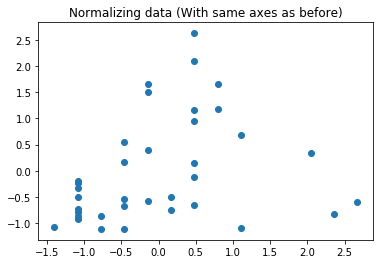

In [39]:
x = finalDT['Mean_Unemployment']
y = finalDT['No_Of_Crimes']
pearson_coef,p_value= pr(x,y)

plt.figure()
plt.xlabel("Unemployment (%)")
plt.ylabel("Number of Crimes")
plt.title("Looking for correlation between unemployment and number of crimes")

plt.scatter(x, y)

plt.savefig('unemploymentNumberOfCrimes.png')
plt.show()

print("Averages")
print("x: ", x.mean(), " y: ", y.mean())
print("Standard deviation")
print("x: ", x.std(), " y: ", y.std())
print('pearson_coef: ',pearson_coef, 'p_value: ',p_value)
display(finalDT.corr())

plt.figure()
plt.title("Normalizing data (With same axes as before)")
plt.scatter(stats.zscore(x), stats.zscore(y))
plt.show()



# This implies that as x increases so does y , That means no_of_crimes is directly proportional to unemployment_rate

In [ ]:
DT=pd.DataFrame()
for key,val in df:
    val = val.drop(columns=['Highest_Offense_Desc'])
    DT = pd.concat([DT,val],axis=0)
DT.reset_index(drop=True,inplace=True)
#display(DT)
plt.figure(figsize=(16,10))   
sns.boxplot(x=DT['Zip_Code_Crime'],y=DT['Unemployment'],palette='spring')
plt.xticks(rotation=90)
plt.show()

#Tried to find out the outliers of the unemployment for every zip_code but eventually landed up to no outliers ,hence the mean of unemployment is perfect

# Here we analyze crime clearance rate by crime type.

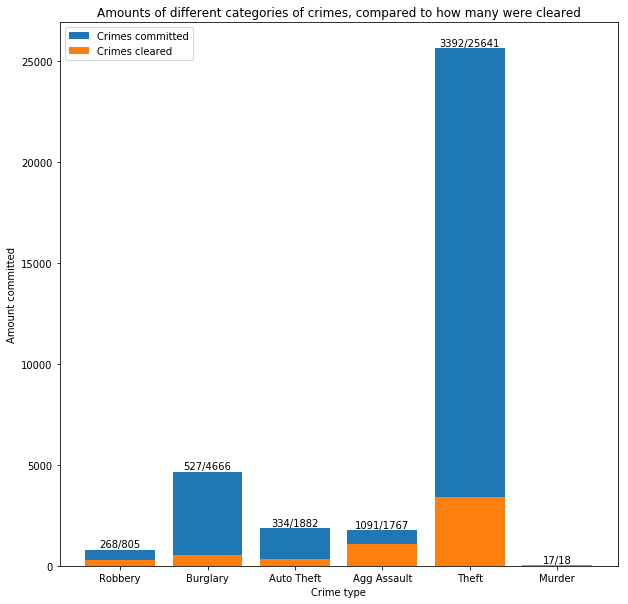

In [40]:
x = []
y = []
y2 = []
for crime, clearance in zip(reports1.Highest_NIBRS_UCR_Offense_Description, reports1.Clearance_Status):
    if crime in x:
        y[x.index(crime)] += 1
        y2[x.index(crime)] += int(clearance != 'N')
    else:
        y.append(1)
        y2.append(int(clearance != 'N'))
        x.append(crime)
plt.figure(figsize=(10, 10))
ax = plt.bar(x, y, width=0.8)
ax2 = plt.bar(x, y2)
plt.title("Amounts of different categories of crimes, compared to how many were cleared")
plt.xlabel("Crime type")
plt.ylabel("Amount committed")
plt.legend(['Crimes committed', 'Crimes cleared'])


for rect, label, label2 in zip(ax.patches, y, y2):
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width() / 2, height + 5, str(label2) + "/" + str(label), ha='center', va='bottom')


plt.savefig('clearanceRateByCrimeType.png')
plt.show()

# Here we examine the effect that median income has on cleared crime

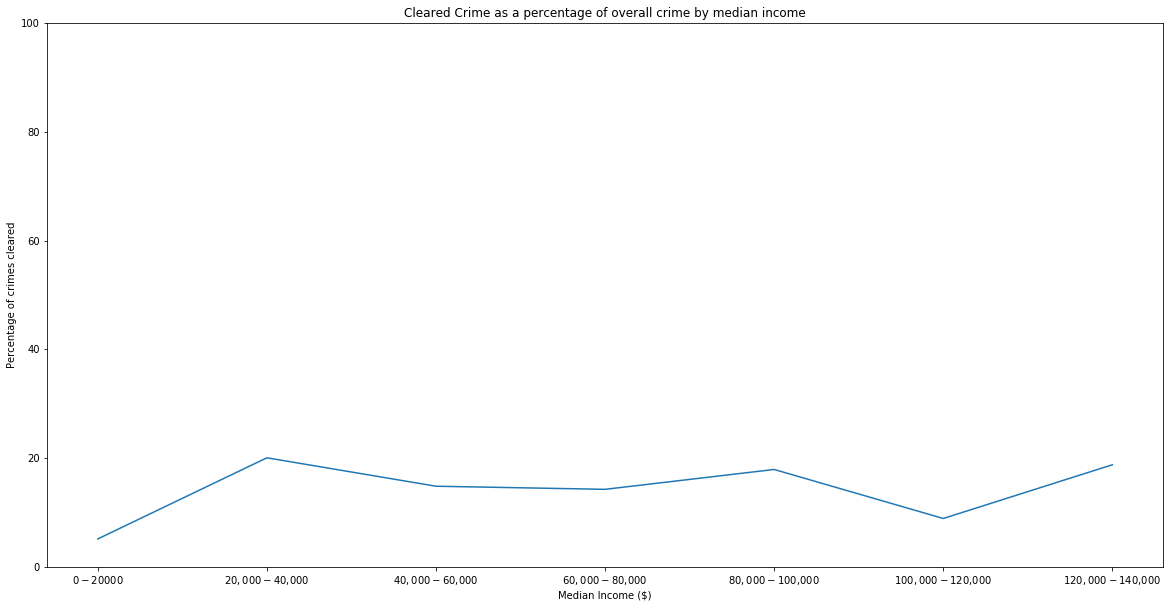

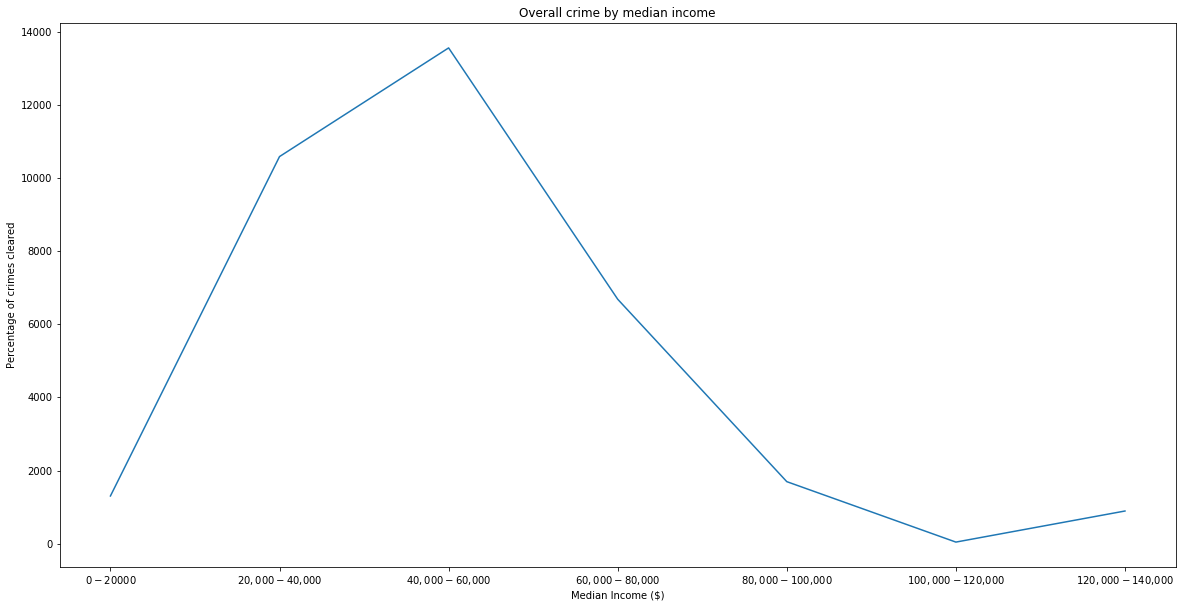

In [44]:
x = [0, 0, 0, 0, 0, 0, 0]
x2 = [0, 0, 0, 0, 0, 0, 0]
for income, clearance in zip(reports1.Medianhouseholdincome, reports1.Clearance_Status):
    x[math.trunc(income / 20000)] += 1
    x2[math.trunc(income / 20000)] += int(clearance != 'N')

plt.figure(figsize=(20, 10))

plt.title("Cleared Crime as a percentage of overall crime by median income")
plt.xlabel("Median Income ($)")
plt.ylabel("Percentage of crimes cleared")
plt.xticks([x for x in range(7)], ["$0-$20000", "$20,000-$40,000", "$40,000-$60,000", "$60,000-$80,000", "$80,000-$100,000", "$100,000-$120,000", "$120,000-$140,000"])
plt.ylim(0, 100)

plt.plot([(x2 / x) * 100 for x, x2 in zip(x, x2)])

plt.savefig('medianIncomeOnClearedCrime.png')
plt.show()

plt.figure(figsize=(20, 10))
plt.title("Overall crime by median income")
plt.xlabel("Median Income ($)")
plt.ylabel("Percentage of crimes cleared")
plt.xticks([x for x in range(7)], ["$0-$20000", "$20,000-$40,000", "$40,000-$60,000", "$60,000-$80,000", "$80,000-$100,000", "$100,000-$120,000", "$120,000-$140,000"])

plt.plot(x)

plt.savefig("medianIncomeOnCrime.png")
plt.show()

# Here we examine the effects of median income on crime rates per person

We start by importing Austin wage information, and link that up with our crime data

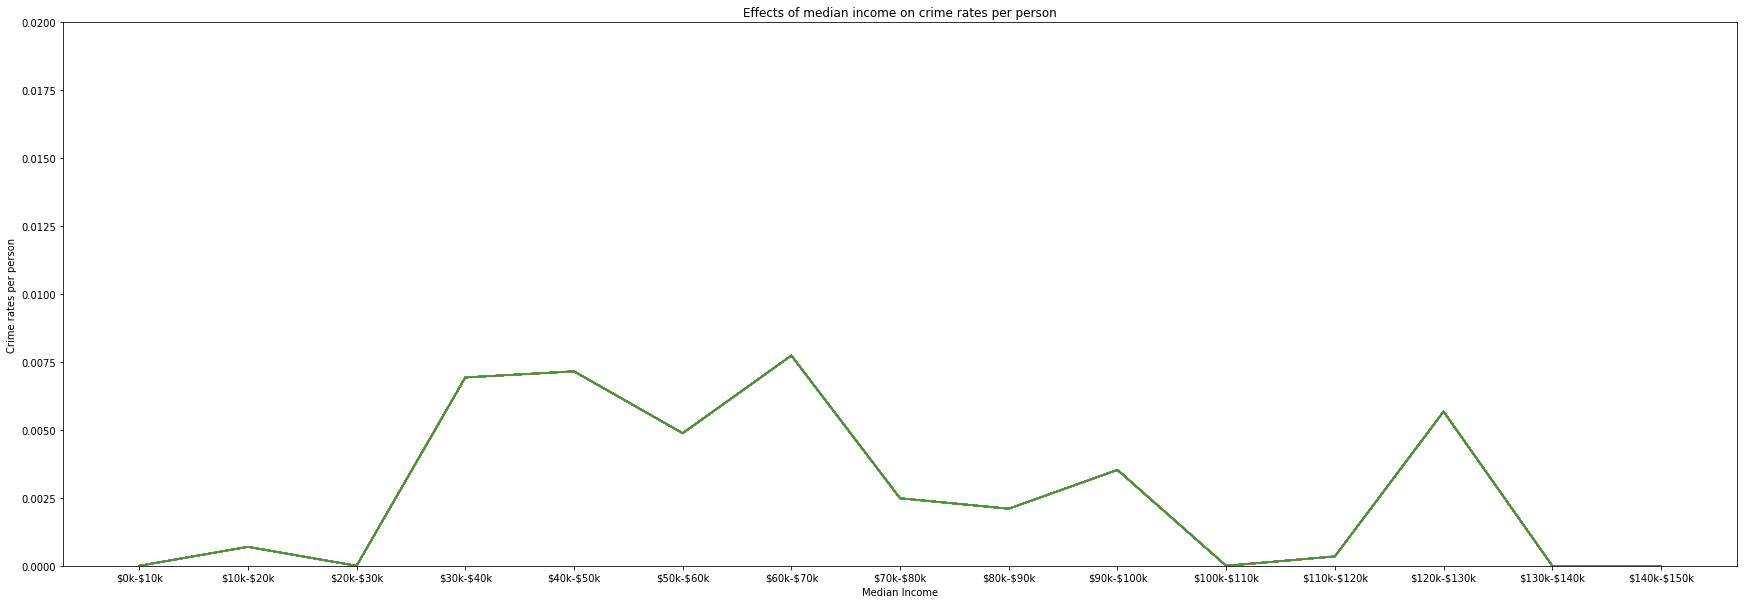

In [45]:
# Data from https://datausa.io/profile/geo/austin-tx/
austin = pd.read_csv("austin-wage.csv")

x=["\$" + str(i * 10) + "k-\$" + str((i + 1) * 10) + "k" for i in range(15)]
y=[reports1[(reports1.Medianhouseholdincome >= i * 10000) & (reports1.Medianhouseholdincome < (i + 1) * 10000)].count() for i in range(15)]

plt.figure(figsize=(30, 10))
plt.title("Effects of median income on crime rates per person")
plt.xlabel('Median Income')
plt.ylabel('Crime rates per person')
plt.ylim(0.0, 0.02)

plt.plot(
    x,
    [count / a for a, count in zip(austin.num_ppl, y)]
)

plt.savefig('medianIncomeCrimeRate.png')
plt.show()